# Infinite Cylinder Radar Cross Section

Cylinders are commonly used to represent scatterers such as the fuselage of missiles, airplanes, and other objects.    This makes circular cylinders a particularly important class of objects for radar cross-section investigation. The solution of the scattering from circular cylinders is given in terms of Bessel and Hankel functions, for which there are numerous tabulated values as well as libraries such as SciPy for their calculation.


The two-dimensional bistatic radar cross section for the TM\textsuperscript{z} polarization is given as (Equation 7.21)

$$
    \sigma_{2D} = \frac{2\lambda}{\pi}\Bigg| \sum\limits_{n=0}^{\infty} \epsilon_n\frac{J_n(ka)}{H_n^{(2)}(ka)} \cos(n\, \phi_o)\Bigg|^2 \hspace{0.5in} \text{(m)},
$$

The two-dimensional bistatic radar cross section for the TEz polarization is given as (Equation 7.23)

$$
    \sigma_{2D} = \frac{2\lambda}{\pi}\Bigg| \sum\limits_{n=0}^{\infty} \epsilon_n\frac{J_n^\prime(ka)}{H_n^{(2)\prime}(ka)} \cos(n\, \phi_o)\Bigg|^2 \hspace{0.5in} \text{(m)}.
$$

The difference in the two-dimensional radar cross section for the TMz and TEz polarizations is the first derivative of the Bessel and Hankel functions for the TEz case.

For finite length cylinders with normal incidence, the three-dimensional radar cross section is related to the two-dimensional radar cross section by (Equation 7.24)

$$
    \sigma_{3D} \approx \sigma_{2D}\frac{2 L^2}{\lambda} \hspace{0.5in}\text{(m^2)},
$$

where $L$ is the cylinder length.  The three-dimensional radar cross section for the TMz and TEz polarizations is then (Equations 7.25 and 7.26)

$$
    \sigma_{TM} \approx \frac{4L^2}{\pi}\, \Bigg| \sum\limits_{n=0}^{\infty} \epsilon_n\frac{J_n(ka)}{H_n^{(2)}(ka)} \cos(n\, \phi_o)\Bigg|^2 \hspace{0.5in} \text{(m^2)},
$$

and

$$
    \sigma_{TE} \approx \frac{4L^2}{\pi}\, \Bigg| \sum\limits_{n=0}^{\infty} \epsilon_n\frac{J_n^\prime(ka)}{H_n^{(2)\prime}(ka)} \cos(n\, \phi_o)\Bigg|^2 \hspace{0.5in} \text{(m^2)}.
$$

Begin by getting the library path

In [1]:
import libs_path

Set the operating frequency (Hz), the radius (m), the length (for 3D RCS) (m) and the number of modes

In [2]:
frequency = 3000e6

radius = 0.5

length = 20.0

number_of_modes = 30

Select either 2D or 3D RCS

In [3]:
mode = '2D'

Set the observation angles with the `linspace` routine from `scipy`

In [4]:
from scipy import linspace

observation_angle = linspace(-90, 90, 1801)

Calculate the radar cross section based on the mode

In [5]:
from Libs.rcs.infinite_cylinder import radar_cross_section, radar_cross_section_3d


if mode == '2D':

    rcs_te, rcs_tm = radar_cross_section(frequency, radius, observation_angle, number_of_modes)

else:

    rcs_te, rcs_tm = radar_cross_section_3d(frequency, radius, observation_angle, number_of_modes, length)

Display the RCS for the infinite cylinder using the `matplotlib` routines

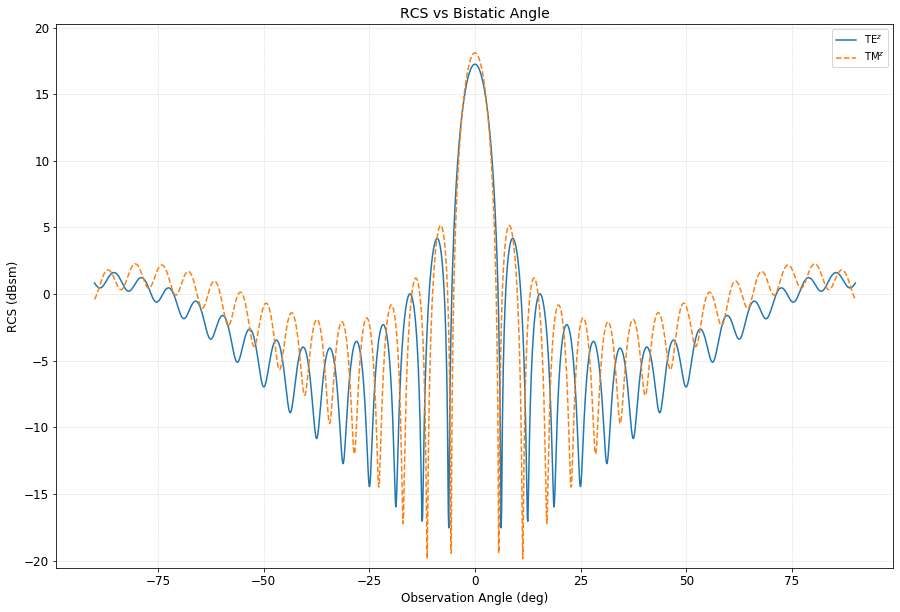

In [7]:
from matplotlib import pyplot as plt

from scipy import log10, degrees


# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)



# Display the results

plt.plot(observation_angle, 10.0 * log10(rcs_te), '', label='TE$^z$')

plt.plot(observation_angle, 10.0 * log10(rcs_tm), '--', label='TM$^z$')



# Set the plot title and labels

plt.title('RCS vs Bistatic Angle', size=14)

plt.ylabel('RCS (dBsm)', size=12)

plt.xlabel('Observation Angle (deg)', size=12)

plt.ylim(min(10.0 * log10(rcs_te)) - 3, max(10.0 * log10(rcs_te)) + 3)



# Set the tick label size

plt.tick_params(labelsize=12)



# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)


# Set the legend

plt.legend(loc='upper right', prop={'size': 10})